Use Decision Tree Classifier to predict if a person will survive in Titanic Disaster or not

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [37]:
df=pd.read_csv("titanic.csv")

In [38]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
df.insert(0, 'ID', range(1, 1 + len(df)))
df.set_index("ID",inplace=True)

In [41]:
df.drop("PassengerId",axis=1,inplace=True)

In [42]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
ID,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [43]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [44]:
# in our dataframe Age,Cabin,Embarked  three columns have null values 
# so if 90% or above column data are null then we will remove that column
nullper=(df.isnull().sum()/len(df))*100

In [45]:
nullper

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [46]:
# change datatype of Age from object to integer 
df['Age']=df['Age'].astype(float)
# find mean of all Age column and replace nan values with that mean value
df['Age'].fillna(df['Age'].mean(),inplace=True)

# df['Age']=df['Age'].fillna(df['Age'].mean())

In [47]:
# data cleaning for Cabin
df.drop("Cabin",axis=1,inplace=True)

In [48]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [49]:
tit_num=df.select_dtypes(['int64','float64'])

In [50]:
tit_cat=df.select_dtypes(['object'])

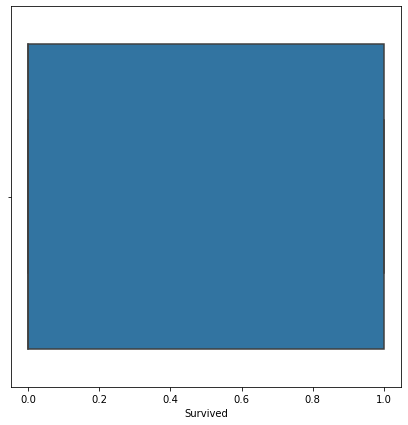

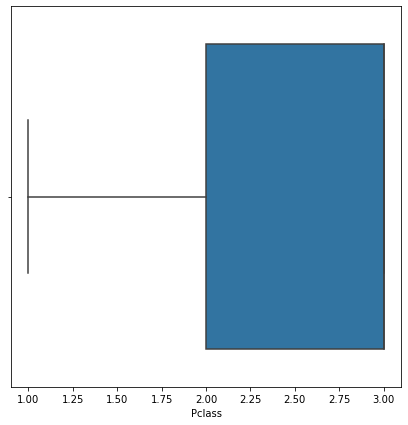

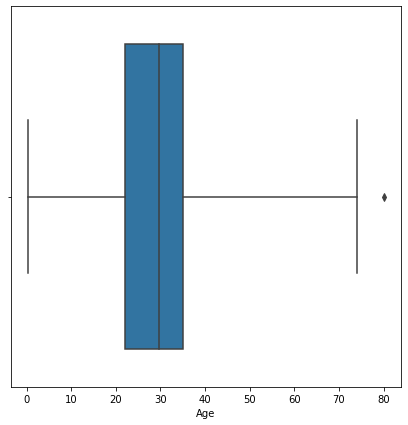

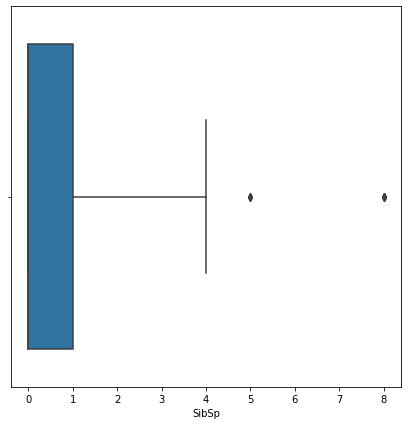

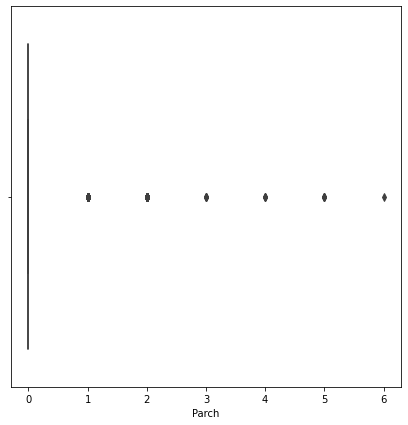

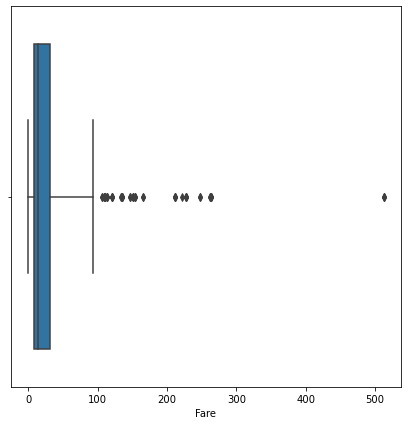

In [51]:
for i in tit_num:
    plt.figure(figsize=(7,7))
    sns.boxplot(data=tit_num,x=i,whis=3) #whis value is not gievn then whis default value is 1.5
    # upper whisker = q3+1.5*IQR
    # lower whisker = q1 - 1.5*IQR 
    # boxplot will calculate upper whisker and lower whisker by it's own and the nit will plot the box
    plt.show()

In [52]:
# Fare Column Outlier Treatment 
q1=np.quantile(df["Fare"],0.25)
q3=np.quantile(df["Fare"],0.75)
iqr=q3-q1
print("Quantile1 for Fare is => ",q1)
print("Quantile3 for Fare is => ",q3)
print("IQR for Fare column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)
tit_num.shape
# accept all those records which come below given whisker values
tit_num=tit_num[tit_num["Fare"]<up_whs]
tit_num.shape

Quantile1 for Fare is =>  7.9104
Quantile3 for Fare is =>  31.0
IQR for Fare column is =>  23.0896
upper whisker with 3 penalty is =>  100.2688


(838, 6)

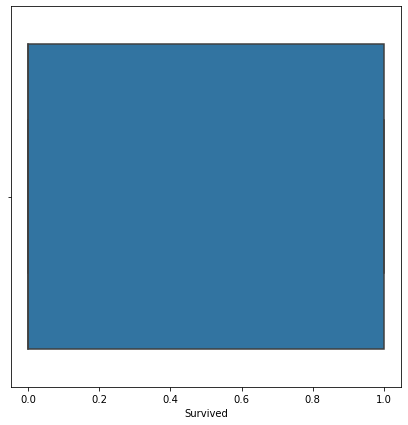

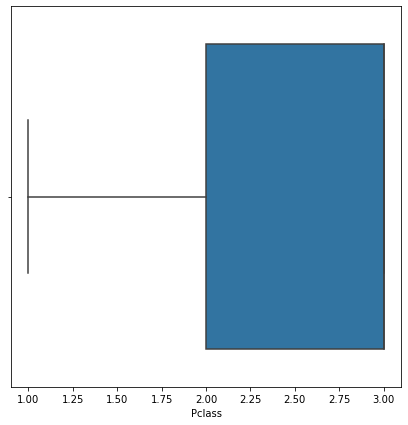

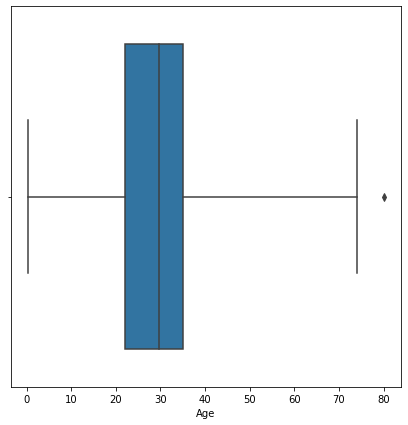

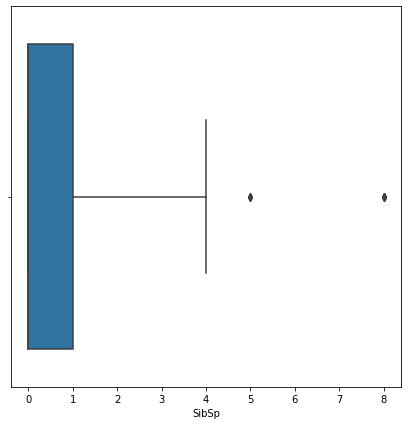

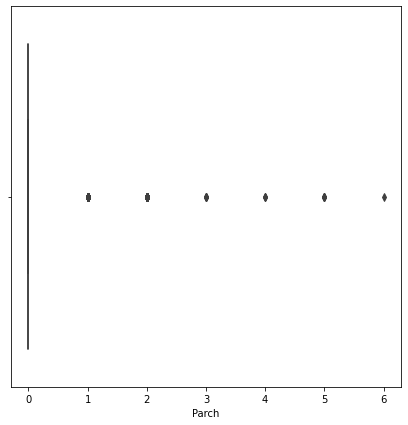

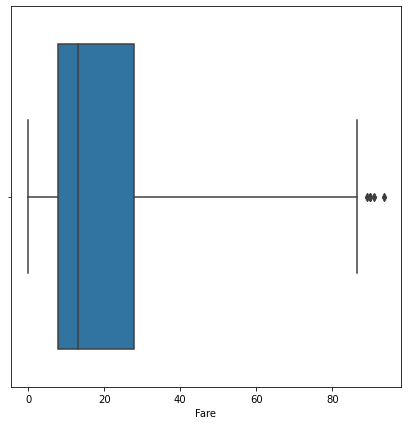

In [53]:
for i in tit_num:
    plt.figure(figsize=(7,7))
    sns.boxplot(data=tit_num,x=i,whis=3) #whis value is not gievn then whis default value is 1.5
    # upper whisker = q3+1.5*IQR
    # lower whisker = q1 - 1.5*IQR 
    # boxplot will calculate upper whisker and lower whisker by it's own and the nit will plot the box
    plt.show()

In [54]:
tit_cat

,Name,Sex,Ticket,Embarked
ID,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
5,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
887,"Montvila, Rev. Juozas",male,211536,S
888,"Graham, Miss. Margaret Edith",female,112053,S
889,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S


In [55]:
tit_cat.drop("Ticket",axis=1,inplace=True)
tit_cat.drop("Embarked",axis=1,inplace=True)

In [56]:
tit_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    891 non-null    object
 1   Sex     891 non-null    object
dtypes: object(2)
memory usage: 20.9+ KB


In [57]:
from sklearn.preprocessing import LabelEncoder 

In [58]:
le=LabelEncoder()
for col in tit_cat:
    tit_cat[col]=le.fit_transform(tit_cat[col])

In [59]:
tit_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Name    891 non-null    int32
 1   Sex     891 non-null    int32
dtypes: int32(2)
memory usage: 13.9 KB


In [60]:
tit_cat

,Name,Sex
ID,,
1,108,1
2,190,0
3,353,0
4,272,0
5,15,1
...,...,...
887,548,1
888,303,0
889,413,0


In [61]:
# final df which is ready for ML algorithm we will create 
df_new=pd.merge(tit_num,tit_cat,on="ID")

In [62]:
df_new

,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex
ID,,,,,,,,
1,0,3,22.000000,1,0,7.2500,108,1
2,1,1,38.000000,1,0,71.2833,190,0
3,1,3,26.000000,0,0,7.9250,353,0
4,1,1,35.000000,1,0,53.1000,272,0
5,0,3,35.000000,0,0,8.0500,15,1
...,...,...,...,...,...,...,...,...
887,0,2,27.000000,0,0,13.0000,548,1
888,1,1,19.000000,0,0,30.0000,303,0
889,0,3,29.699118,1,2,23.4500,413,0


In [64]:
feature=df_new[["Age","Sex"]]

In [65]:
feature

,Age,Sex
ID,,
1,22.000000,1
2,38.000000,0
3,26.000000,0
4,35.000000,0
5,35.000000,1
...,...,...
887,27.000000,1
888,19.000000,0
889,29.699118,0


In [66]:
target=df_new["Survived"]

In [67]:
target

ID
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 838, dtype: int64

In [68]:
dt=DecisionTreeClassifier() # criterion='gini' default 

In [69]:
dt.fit(feature,target)

DecisionTreeClassifier()

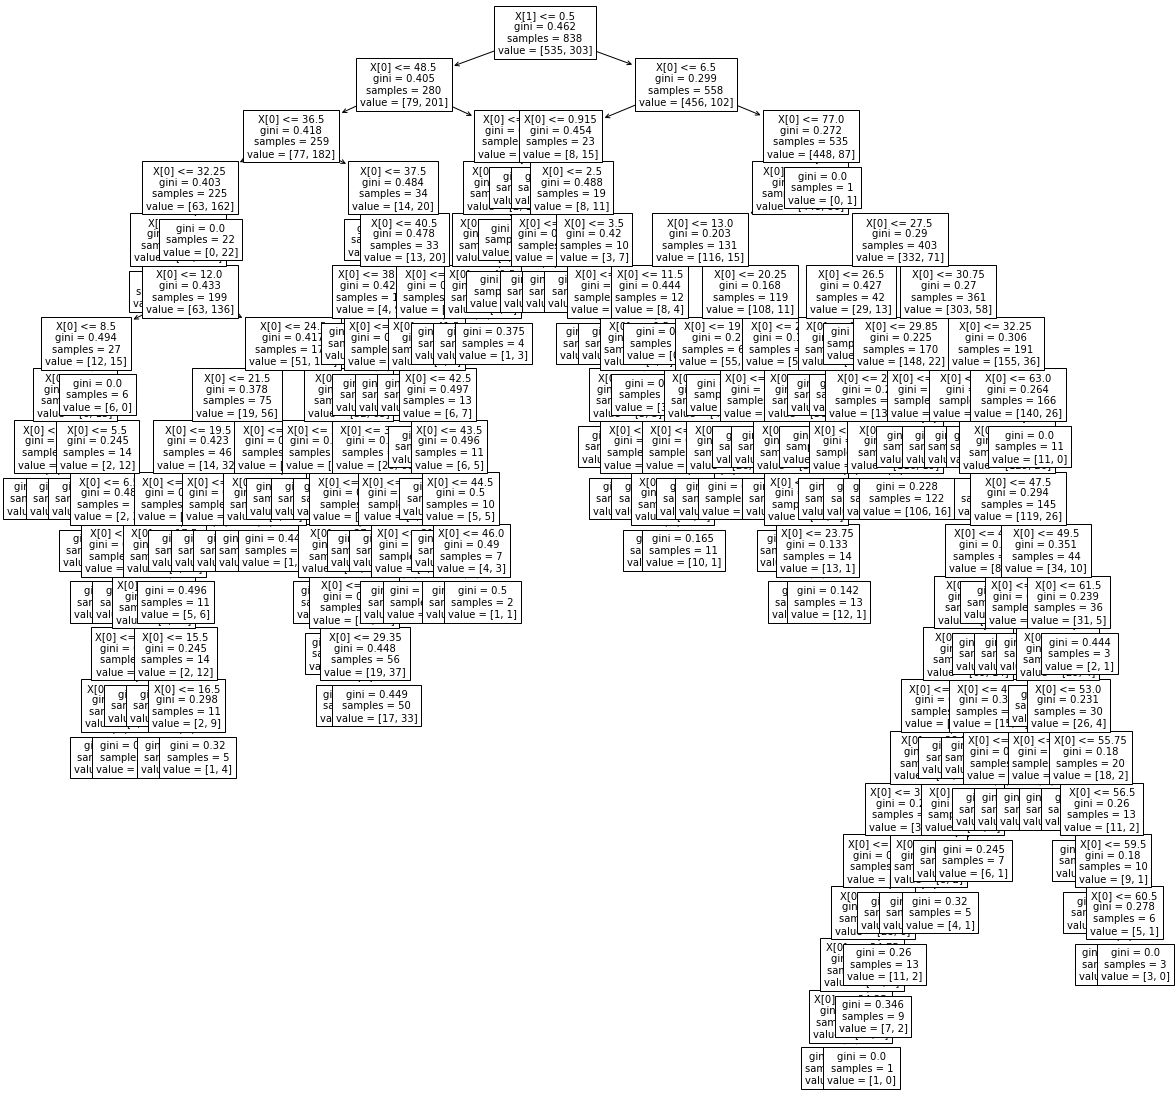

In [77]:
fig,ax=plt.subplots(figsize=(20,20))
tree.plot_tree(dt.fit(feature,target),fontsize=10)
plt.savefig("tree_titanic_survied",dpi=100) # dot per inch